**1. Brief on Dataset:
The dataset I have choosen contains 1,000 entries with 23 columns, including user details, subscription prices, watch hours, favorite genres, payment methods, ratings, and more.**

In [134]:
# importing related libraries.
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

**2. Performing Data Cleaning**

In [135]:
# Reading the data.
df = pd.read_csv('/kaggle/input/streaming-service-data/streaming_service_data.csv')

In [136]:
df.head()

,User_ID,User_Name,Join_Date,Last_Login,Monthly_Price,Watch_Hours,Favorite_Genre,Active_Devices,Profile_Count,Parental_Controls,...,Payment_Method,Language_Preference,Recommended_Content_Count,Average_Rating_Given,Has_Downloaded_Content,Membership_Status,Loyalty_Points,First_Device_Used,Age_Group,Primary_Watch_Time
0,2518,Amber,5/15/2023,12/13/2024,7.99,49,Action,3,6,True,...,PayPal,Hindi,84,3.3,False,Active,2878,Smartphone,35-44,Late Night
1,6430,Patrick,4/3/2023,12/15/2024,7.99,161,Drama,1,2,True,...,PayPal,German,69,4.0,False,Active,2291,Desktop,25-34,Evening
2,1798,Robert,8/2/2023,12/14/2024,11.99,87,Action,2,5,False,...,Debit Card,Mandarin,56,3.1,False,Active,1692,Desktop,35-44,Late Night
3,5255,Cole,1/31/2023,12/2/2024,15.99,321,Sci-Fi,1,5,False,...,Debit Card,Mandarin,47,4.6,False,Active,952,Desktop,25-34,Evening
4,2854,Jamie,6/6/2023,12/15/2024,11.99,386,Documentary,1,4,True,...,PayPal,Mandarin,39,3.7,False,Active,1823,Desktop,25-34,Late Night


In [137]:
# Information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    1000 non-null   int64  
 1   User_Name                  1000 non-null   object 
 2   Join_Date                  1000 non-null   object 
 3   Last_Login                 1000 non-null   object 
 4   Monthly_Price              1000 non-null   float64
 5   Watch_Hours                1000 non-null   int64  
 6   Favorite_Genre             1000 non-null   object 
 7   Active_Devices             1000 non-null   int64  
 8   Profile_Count              1000 non-null   int64  
 9   Parental_Controls          1000 non-null   bool   
 10  Total_Movies_Watched       1000 non-null   int64  
 11  Total_Series_Watched       1000 non-null   int64  
 12  Country                    1000 non-null   object 
 13  Payment_Method             1000 non-null   object

In [138]:
# Describing the data like count, mean, std, min, max and more
df.describe()

,User_ID,Monthly_Price,Watch_Hours,Active_Devices,Profile_Count,Total_Movies_Watched,Total_Series_Watched,Recommended_Content_Count,Average_Rating_Given,Loyalty_Points
count,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,5610.52100,12.026000,254.516000,3.04600,3.460000,515.897000,99.746000,51.482000,4.01030,2444.217000
std,2566.98922,3.238702,140.667264,1.42966,1.749703,282.697585,58.452238,29.323498,0.58459,1434.619603
min,1003.00000,7.990000,10.000000,1.00000,1.000000,12.000000,1.000000,0.000000,3.00000,3.000000
25%,3587.75000,7.990000,136.000000,2.00000,2.000000,273.750000,48.750000,26.000000,3.50000,1251.500000
50%,5694.00000,11.990000,256.000000,3.00000,3.000000,510.000000,103.000000,52.500000,4.00000,2423.000000
75%,7794.25000,15.990000,373.250000,4.00000,5.000000,770.750000,150.000000,77.000000,4.50000,3660.000000
max,9996.00000,15.990000,500.000000,5.00000,6.000000,1000.000000,200.000000,100.000000,5.00000,4990.000000


In [139]:
# Displaying the current columns.
df.columns

Index(['User_ID', 'User_Name', 'Join_Date', 'Last_Login', 'Monthly_Price',
       'Watch_Hours', 'Favorite_Genre', 'Active_Devices', 'Profile_Count',
       'Parental_Controls', 'Total_Movies_Watched', 'Total_Series_Watched',
       'Country', 'Payment_Method', 'Language_Preference',
       'Recommended_Content_Count', 'Average_Rating_Given',
       'Has_Downloaded_Content', 'Membership_Status', 'Loyalty_Points',
       'First_Device_Used', 'Age_Group', 'Primary_Watch_Time'],
      dtype='object')

In [140]:
# Removing unwanted Columns like user id ,name and dates.
df.drop(['User_ID', 'User_Name', 'Join_Date', 'Last_Login'], axis=1, inplace=True)

In [141]:
#Dealing with null values
df.isnull().sum()

Monthly_Price                0
Watch_Hours                  0
Favorite_Genre               0
Active_Devices               0
Profile_Count                0
Parental_Controls            0
Total_Movies_Watched         0
Total_Series_Watched         0
Country                      0
Payment_Method               0
Language_Preference          0
Recommended_Content_Count    0
Average_Rating_Given         0
Has_Downloaded_Content       0
Membership_Status            0
Loyalty_Points               0
First_Device_Used            0
Age_Group                    0
Primary_Watch_Time           0
dtype: int64

In [142]:
# I checked to find all columns don't have any null value.

**3. UNIVARIATE ANALYSIS**

In [143]:
df.columns

Index(['Monthly_Price', 'Watch_Hours', 'Favorite_Genre', 'Active_Devices',
       'Profile_Count', 'Parental_Controls', 'Total_Movies_Watched',
       'Total_Series_Watched', 'Country', 'Payment_Method',
       'Language_Preference', 'Recommended_Content_Count',
       'Average_Rating_Given', 'Has_Downloaded_Content', 'Membership_Status',
       'Loyalty_Points', 'First_Device_Used', 'Age_Group',
       'Primary_Watch_Time'],
      dtype='object')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Monthly_Price              1000 non-null   float64
 1   Watch_Hours                1000 non-null   int64  
 2   Favorite_Genre             1000 non-null   object 
 3   Active_Devices             1000 non-null   int64  
 4   Profile_Count              1000 non-null   int64  
 5   Parental_Controls          1000 non-null   bool   
 6   Total_Movies_Watched       1000 non-null   int64  
 7   Total_Series_Watched       1000 non-null   int64  
 8   Country                    1000 non-null   object 
 9   Payment_Method             1000 non-null   object 
 10  Language_Preference        1000 non-null   object 
 11  Recommended_Content_Count  1000 non-null   int64  
 12  Average_Rating_Given       1000 non-null   float64
 13  Has_Downloaded_Content     1000 non-null   bool  

**Numeric Coloumns**

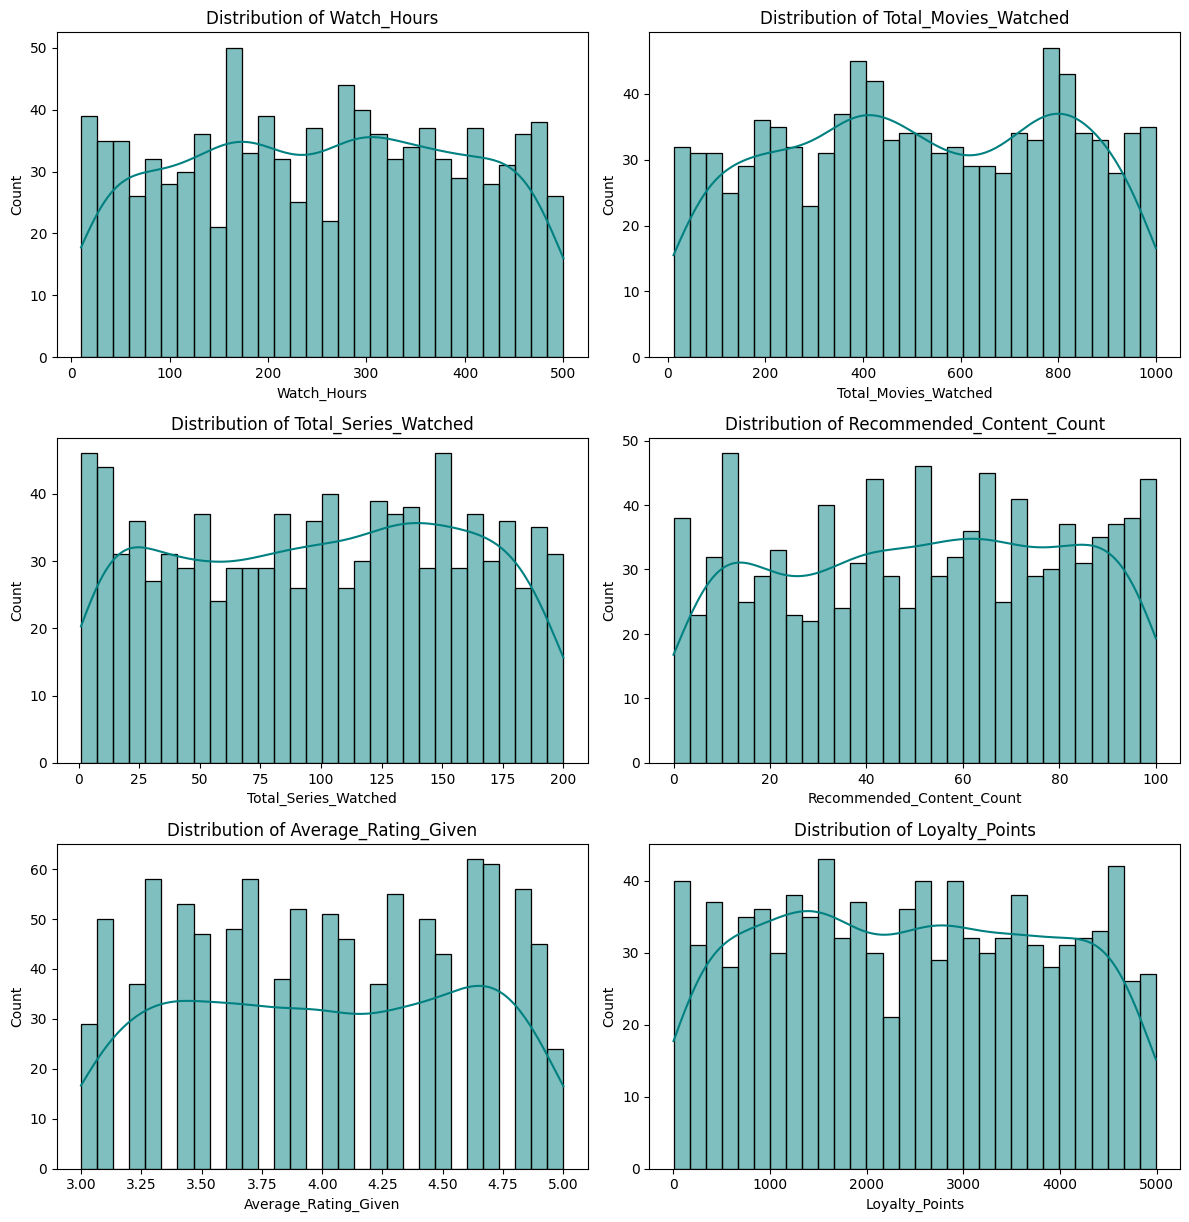

In [145]:
num_cols = ['Watch_Hours', 'Total_Movies_Watched', 'Total_Series_Watched', 'Recommended_Content_Count',
            'Average_Rating_Given', 'Loyalty_Points']

plt.figure(figsize=(12, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='#008080')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


It is obvious that for a very big streaming platform the data of users and there preference largely varies and doesn't account for a pattern formation. This can easily be seen in the graphs plotted above.

**Categrical Columns**

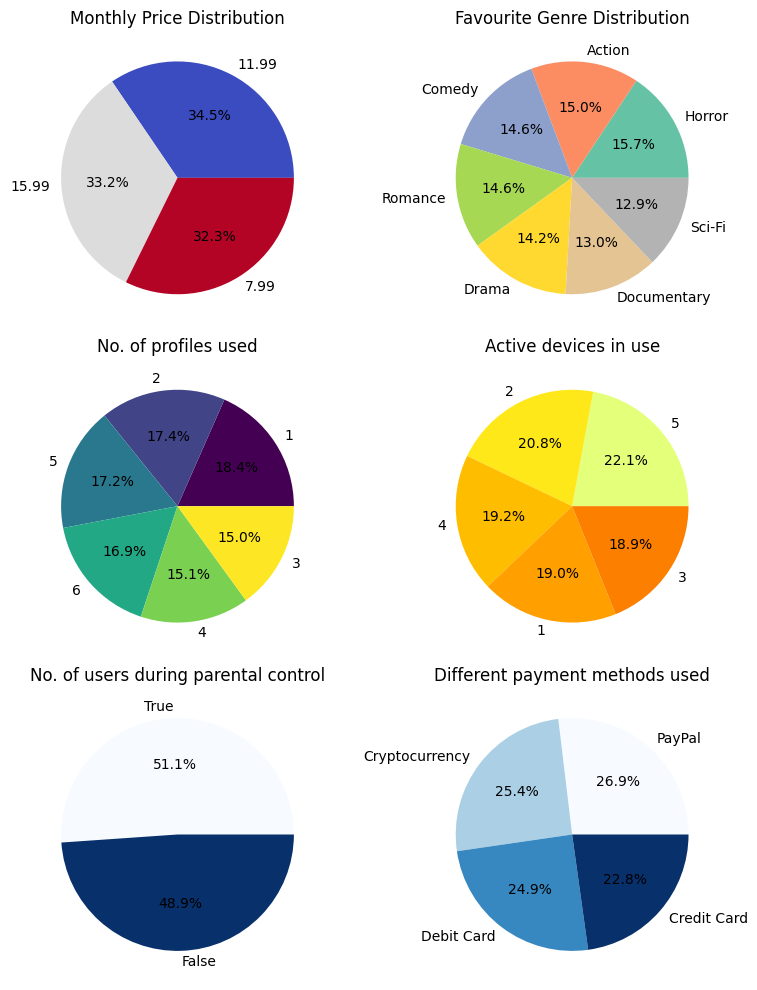

In [146]:
plt.figure(figsize=( 8, 10))

plt.subplot(3, 2, 1)
df['Monthly_Price'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap="coolwarm")
plt.title("Monthly Price Distribution")
plt.ylabel("")

plt.subplot(3, 2, 2)
df['Favorite_Genre'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap="Set2")
plt.title("Favourite Genre Distribution")
plt.ylabel("")

plt.subplot(3, 2, 3)
df['Profile_Count'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap="viridis")
plt.title("No. of profiles used")
plt.ylabel("")

plt.subplot(3, 2, 4)
df['Active_Devices'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap="Wistia")
plt.title("Active devices in use")
plt.ylabel("")

plt.subplot(3, 2, 5)
df['Parental_Controls'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap="Blues")
plt.title("No. of users during parental control")
plt.ylabel("")

plt.subplot(3, 2, 6)
df['Payment_Method'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap="Blues")
plt.title("Different payment methods used")
plt.ylabel("")
# Hide y-label

plt.tight_layout()
plt.show()


The dataset I choose contains quite a lot of uniformly distributed value this can be seen from the fact that in different payment methods the use of crytocurrency is almost equal as that of PayPal or any other standard payment method. This simply means that the dataset is not quite idealistic compared to real-life data. Similar conclusion can be drawn from all the graphs plotted below.

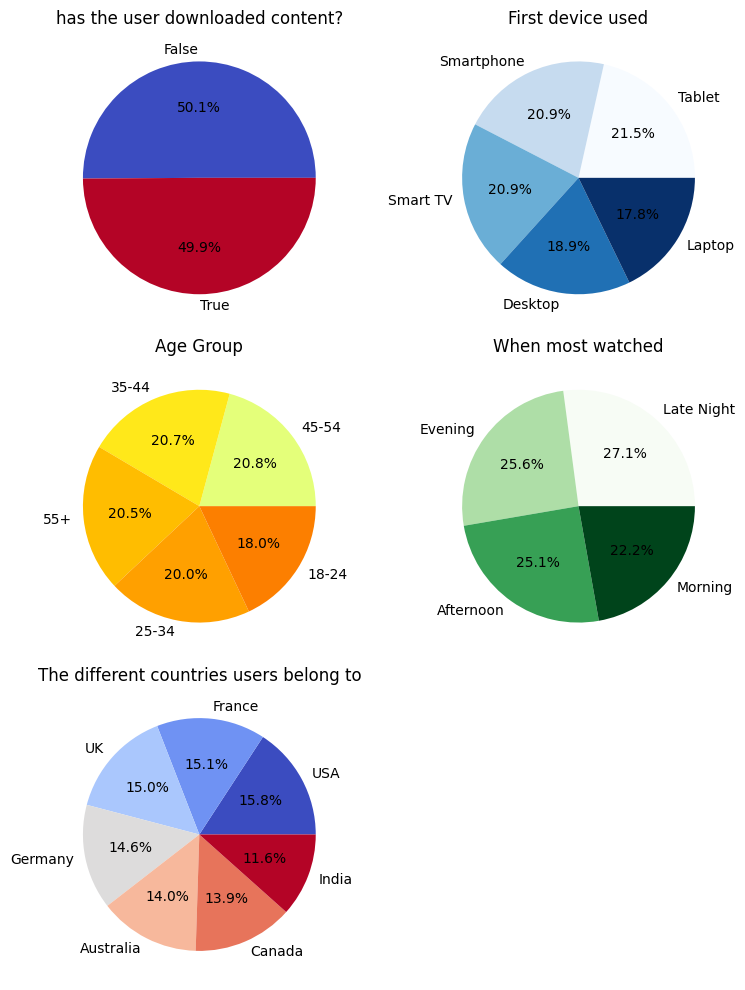

In [147]:
plt.figure(figsize=( 8, 10))

plt.subplot(3, 2, 1)
df['Has_Downloaded_Content'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap="coolwarm")
plt.title("has the user downloaded content?")
plt.ylabel("")

plt.subplot(3, 2, 2)
df['First_Device_Used'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap="Blues")
plt.title("First device used")
plt.ylabel("")

plt.subplot(3, 2, 3)
df['Age_Group'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap="Wistia")
plt.title("Age Group")
plt.ylabel("")

plt.subplot(3, 2, 4)
df['Primary_Watch_Time'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap="Greens")
plt.title("When most watched")
plt.ylabel("")

plt.subplot(3, 2, 5)
df['Country'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap="coolwarm")
plt.title("The different countries users belong to")
plt.ylabel("")  # Hide y-label

plt.tight_layout()
plt.show()


**4. BIVARIATE ANALYSIS**

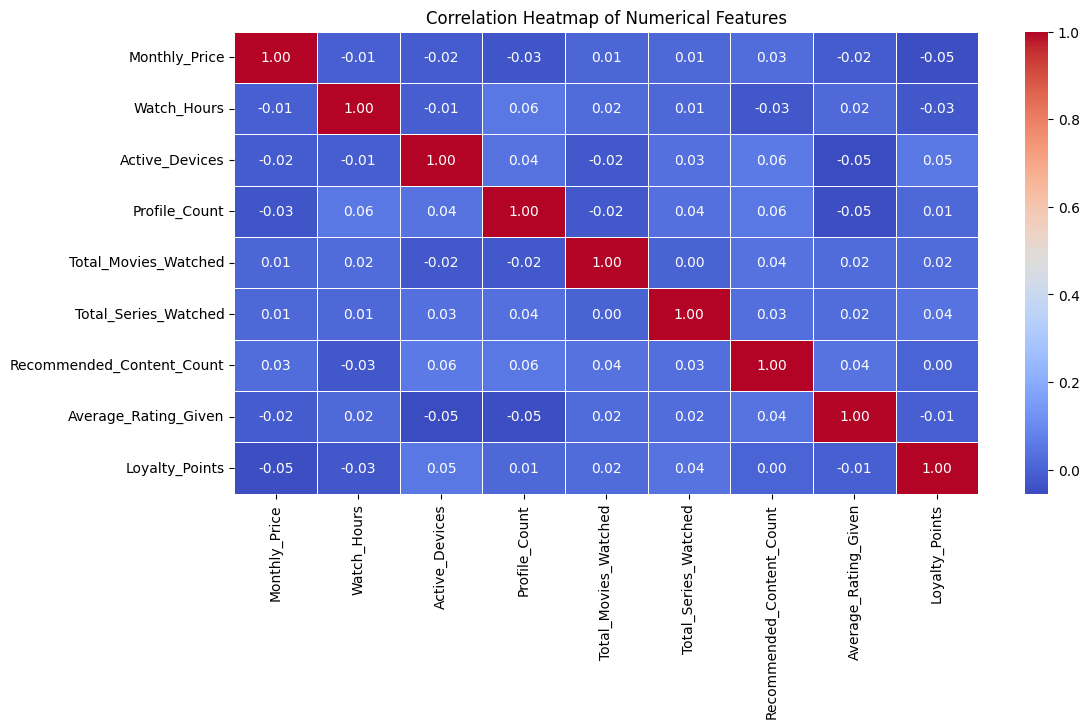

In [148]:
#Correlation Heat Map
# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True,
            cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

Relationship between age and other columns

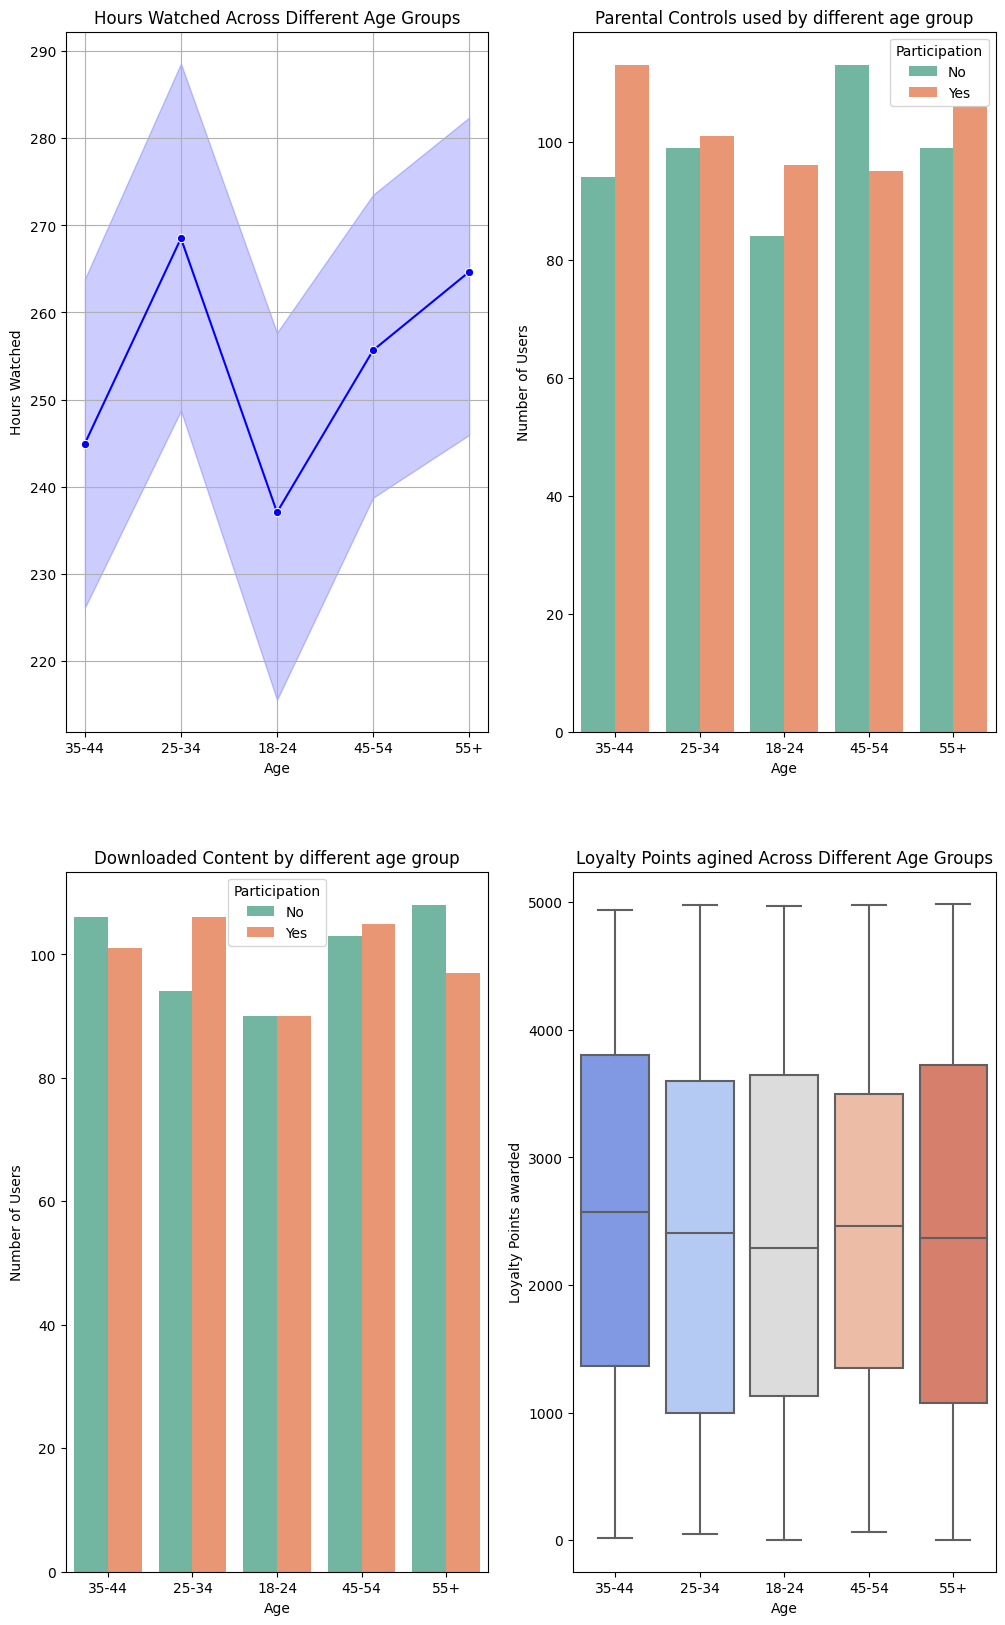

In [149]:
plt.figure(figsize=(12, 20))

plt.subplot(2, 2, 1)
sns.lineplot(x=df["Age_Group"], y=df["Watch_Hours"], marker="o", color="b")
plt.xlabel("Age")
plt.ylabel("Hours Watched")
plt.title("Hours Watched Across Different Age Groups")
plt.grid(True)

plt.subplot(2, 2, 2)
sns.countplot(x=df["Age_Group"], hue=df["Parental_Controls"], palette="Set2")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.title("Parental Controls used by different age group")
plt.legend(title="Participation", labels=["No", "Yes"])

plt.subplot(2, 2, 3)
sns.countplot(x=df["Age_Group"], hue=df["Has_Downloaded_Content"], palette="Set2")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.title("Downloaded Content by different age group")
plt.legend(title="Participation", labels=["No", "Yes"])

plt.subplot(2, 2, 4)
sns.boxplot(x=df["Age_Group"], y=df["Loyalty_Points"], palette="coolwarm")
plt.title("Loyalty Points agined Across Different Age Groups")
plt.xlabel("Age")
plt.ylabel("Loyalty Points awarded")

plt.show()

The age group with most watched hours is that ranging from 25-34 and while that of 18-24 is the lowest which is suprising and could be predicted to be related to the matters of study. 
25-34 also relies a lot on downloaded content as seen from the graphs. Parental control seems highest used in the age range of 35-44 owning to the fact that they can parents of kids and children who need a lot of supervision.

Relationship between monthly plan and other columns

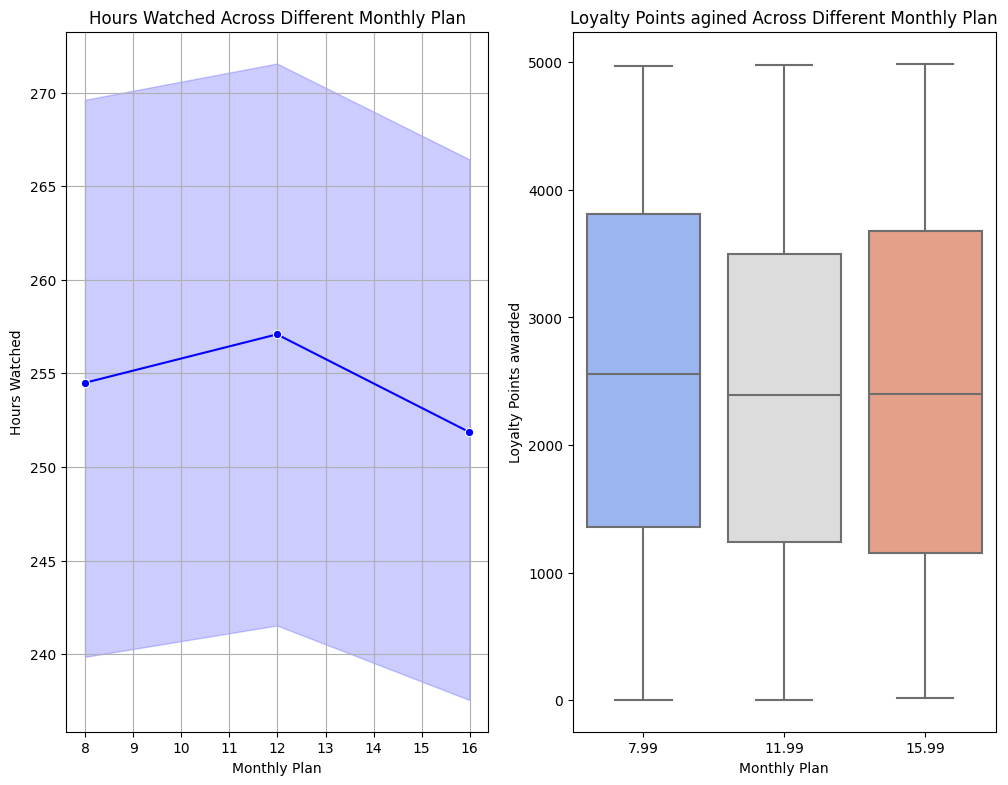

In [150]:
#Relationship between monthly plan and other columns
plt.figure(figsize=(12, 20))

plt.subplot(2, 2, 1)
sns.lineplot(x=df["Monthly_Price"], y=df["Watch_Hours"], marker="o", color="b")
plt.xlabel("Monthly Plan")
plt.ylabel("Hours Watched")
plt.title("Hours Watched Across Different Monthly Plan")
plt.grid(True)

plt.subplot(2, 2, 2)
sns.boxplot(x=df["Monthly_Price"], y=df["Loyalty_Points"], palette="coolwarm")
plt.title("Loyalty Points agined Across Different Monthly Plan")
plt.xlabel("Monthly Plan")
plt.ylabel("Loyalty Points awarded")

plt.show()

If higher-paying users watch more hours, it suggests premium plans offer more engaging content.

If higher plans earn more points, it indicates a reward system for premium users. 

In this case no such observation is witnessed.

**5. MULTIVARIATE ANALYSIS**

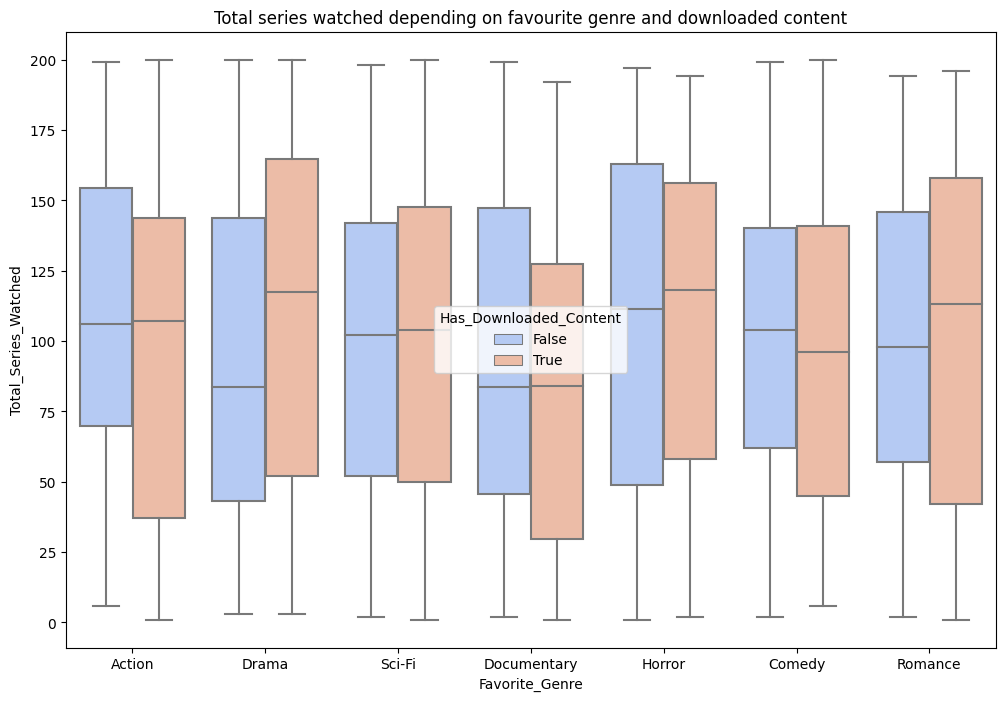

In [151]:
#Effect of availability of downloaded content on number of series watched and favorite genre
plt.figure(figsize=(12,8))
sns.boxplot(x="Favorite_Genre", y="Total_Series_Watched",
            hue="Has_Downloaded_Content", data=df, palette="coolwarm")
plt.title("Total series watched depending on favourite genre and downloaded content")
plt.show()


If users who download content watch more series in certain genres, it suggests genre preferences influence offline viewing behavior. Like here drama is most veiwed as well as downloaded, this is helpful for content creators.

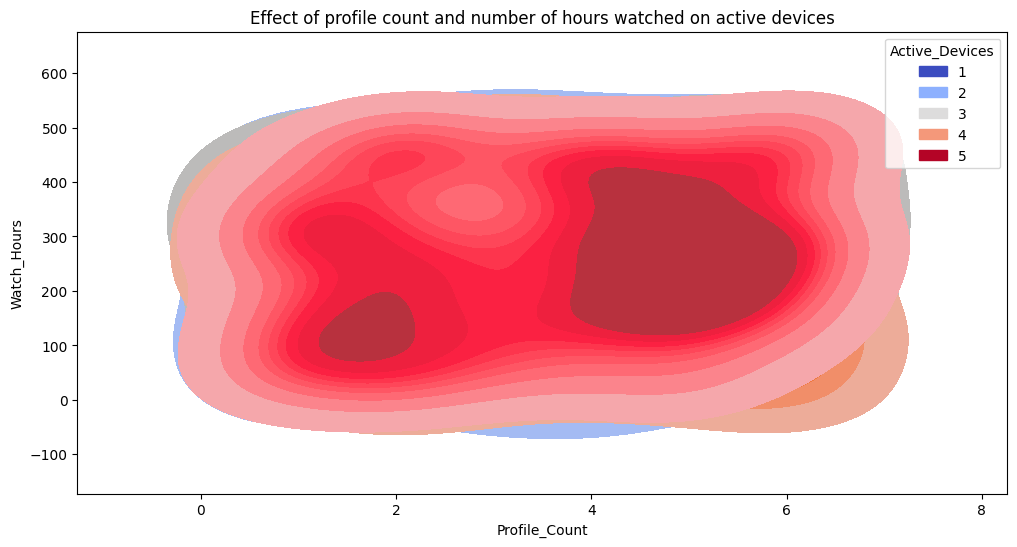

In [152]:
#Factors affecting active devices
plt.figure(figsize=(12,6))
sns.kdeplot(x=df["Profile_Count"], y=df["Watch_Hours"],
            hue=df["Active_Devices"], fill=True, palette="coolwarm")
plt.title("Effect of profile count and number of hours watched on active devices")
plt.show()


It is not necessary that profile count is directly proportional to active devices. Such a thing also depends on Watch hours. People with 4-6 profile count but a moderate level of watch hours have a lot of devices on which they are active. 

my take away could be that this indicates the account being used by family members rather that friends

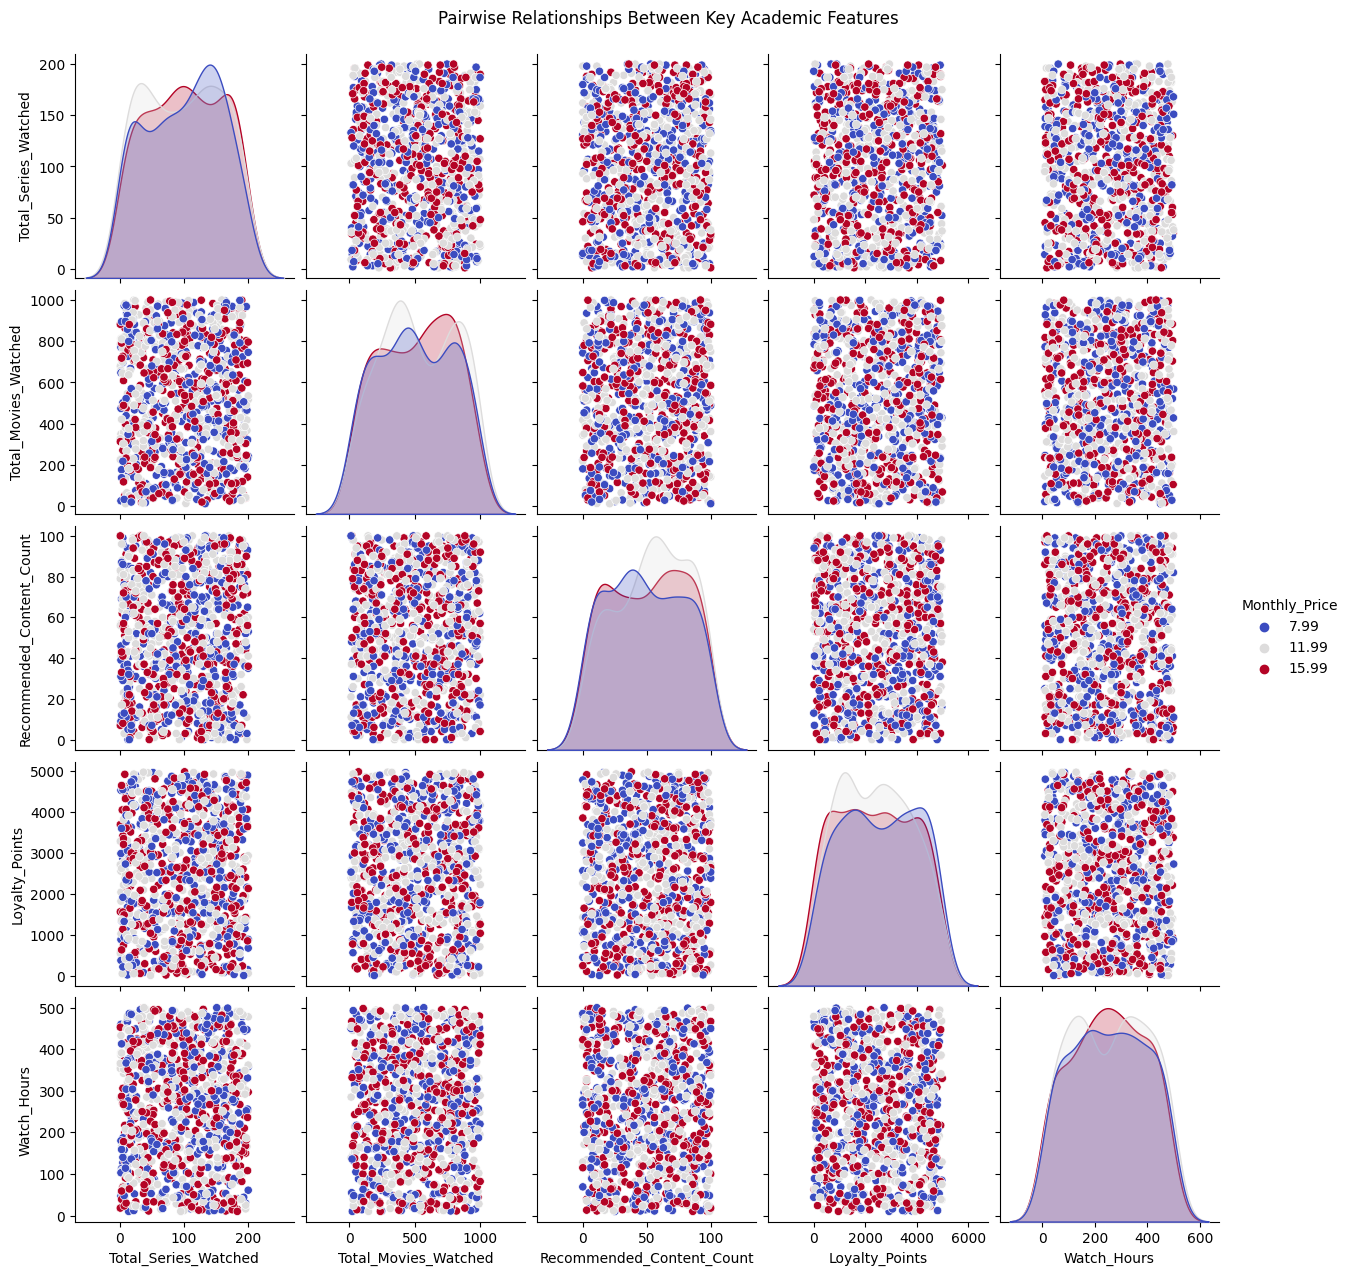

In [153]:
#Taking monthly plan into consideration
sns.pairplot(df, vars=["Total_Series_Watched", "Total_Movies_Watched", "Recommended_Content_Count",
                       "Loyalty_Points", "Watch_Hours"], hue="Monthly_Price", palette="coolwarm")
plt.suptitle("Pairwise Relationships Between Key Academic Features", y=1.02)
plt.show()


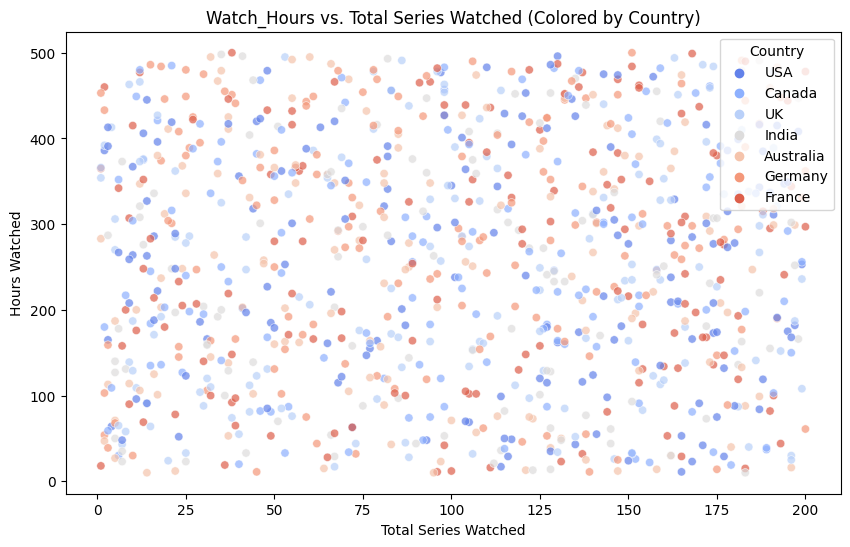

In [154]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="Total_Series_Watched",
    y="Watch_Hours",
    hue="Country",
    palette="coolwarm",
    alpha=0.7
)
plt.title("Watch_Hours vs. Total Series Watched (Colored by Country)")
plt.xlabel("Total Series Watched")
plt.ylabel("Hours Watched")
plt.legend(title="Country")
plt.show()

If a strong positive trend appears, it means people who watch more series also watch for more hours.
Country-based coloring may reveal regional differences in content consumption.

**6. Hypothesis Testing**

Number of Hours Watched

In [155]:
# Calculate skewness
from scipy.stats import skew
print("Watch Hours: " ,skew(df['Watch_Hours']))
print("Loyalty Points: " ,skew(df['Loyalty_Points']))
print("Total Series Watched " ,skew(df['Total_Series_Watched']))
print("Total Movies Watched " ,skew(df['Total_Movies_Watched']))
print("Recommended Content Count " ,skew(df['Recommended_Content_Count']))

Watch Hours:  -0.024082359442259376
Loyalty Points:  0.034535634649054264
Total Series Watched  -0.05596262659370189
Total Movies Watched  -0.037436636659077725
Recommended Content Count  -0.0703603842850698


**IT IS VERY CLEARLY OBSERVED THAT SINCE THE ORIGINAL SKEWNESS BETWEEN -0.5 TO 0.5, THE DISTRIBUTION IS NORMAL HENCE THE GRAPH DID NOT REQUIRE ANY TRANSFORMATION.
BUT INCASE THE SKEWNESS WAS GREATER THAN 1 THEN THIS IS HOW WE WOULD TRANSFORM THE GRAPH**

New Skewness (Log Transformed): -1.318238750658887


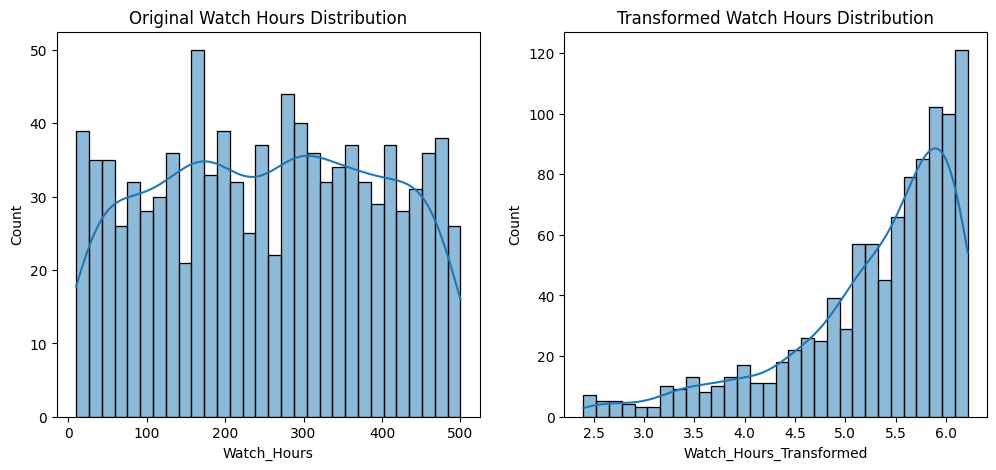

In [156]:
# Apply log transformation to reduce skewness (adding 1 to avoid log(0))
df['Watch_Hours_Transformed'] = np.log1p(df['Watch_Hours'])

# Calculate new skewness
new_skewness = skew(df['Watch_Hours_Transformed'])
print(f'New Skewness (Log Transformed): {new_skewness}')

# Plot original and transformed distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['Watch_Hours'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Original Watch Hours Distribution')

sns.histplot(df['Watch_Hours_Transformed'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Transformed Watch Hours Distribution')

plt.show()

**IT IS VERY CLEARLY OBSERVED THAT SINCE THE ORIGINAL SKEWNESS BETWEEN -0.5 TO 0.5, THE DISTRIBUTION IS NORMAL HENCE THE GRAPH DID NOT REQUIRE ANY TRANSFORMATION.
BUT INCASE THE SKEWNESS WAS GREATER THAN 1 THEN THIS IS HOW WE WOULD TRANSFORM THE GRAPH**

**7. CONFIDENCE INTERVAL FOR AVERAGE RATING GIVEN**

In [157]:
sample_mean = np.mean(df['Average_Rating_Given'])
sample_std = np.std(df['Average_Rating_Given'], ddof=1)  # Sample standard deviation
n = len(df['Average_Rating_Given'])  # Sample size

# Confidence level (95%)
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)  # Z-score for 95% CI

# Margin of error
margin_of_error = z_score * (sample_std / np.sqrt(n))

# Confidence Interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"95% Confidence Interval for Average_Rating_Given: ({lower_bound:.2f}, {upper_bound:.2f})")

95% Confidence Interval for Average_Rating_Given: (3.97, 4.05)


**8. SUMMARY**

In summary, the dataset I use here relatively friendly and did not need too much intervention for data cleaning because it has no duplicated data and small number of missing values. Besides, the data are also large enough to analyse for various purpose. The data set also seemed very ideal which is GENERALLY NOT the case for real datasets.

All datasets given cannot completely depend on each other, their correlation depends on external factors but we can reason out some of them by observing the graphs.